In [1]:
# import stuffs
%matplotlib inline
import numpy as np
import pandas as pd
from pyplotthemes import get_savefig, classictheme as plt
plt.latex = True
savefig = get_savefig('../fig', extensions=['pdf'])

In [8]:
from datasets import get_colon, get_nwtco, get_flchain, get_pbc, get_lung

# Values of (trn, test)
datasets = {}

# Add the data sets
for name, getter in zip(["pbc", "lung", "colon", "nwtco", "flchain"],
                         [get_pbc, get_lung, get_colon, get_nwtco, get_flchain]):
    print("\n", name)
    trn = getter(norm_in=True, norm_out=False, training=True, prints=True)
    test = getter(norm_in=True, norm_out=False, training=False)
    datasets[name] = (trn, test)
    
    cens_trn = (trn.iloc[:, 1] == 0)
    cens_test = (test.iloc[:, 1] == 0)
    cens = np.sum(cens_trn) + np.sum(cens_test)
    total = (trn.shape[0] + test.shape[0])
    censfrac = cens / total
    print(name, "total", total, "censed:", censfrac, np.sum(cens))


 pbc
Input columns were normalized
Shape from (312, 19) to (245, 19)
Censored count: 149.0 / 245  = 60.82%
Final columns: ['time', 'status', 'trt', 'age', 'sex', 'ascites', 'hepato', 'spiders', 'edema', 'bili', 'chol', 'albumin', 'copper', 'alk.phos', 'ast', 'trig', 'platelet', 'protime', 'stage']
pbc total 312 censed: 0.599358974359 187

 lung
Input columns were normalized
Shape from (228, 9) to (171, 9)
Censored count: 47.0 / 171  = 27.49%
Final columns: ['time', 'status', 'age', 'sex', 'ph.ecog', 'ph.karno', 'pat.karno', 'meal.cal', 'wt.loss']
lung total 228 censed: 0.276315789474 63

 colon
Input columns were normalized
Shape from (929, 13) to (696, 15)
Censored count: 345.0 / 696  = 49.57%
Final columns: ['time', 'status', 'rxLev5FU', 'rxObs', 'rxLev', 'sex', 'age', 'obstruct', 'perfor', 'adhere', 'nodes', 'differ', 'extent', 'surg', 'node4']
colon total 929 censed: 0.496232508073 461

 nwtco
Input columns were normalized
Shape from (4028, 6) to (3021, 9)
Censored count: 2592.0 /

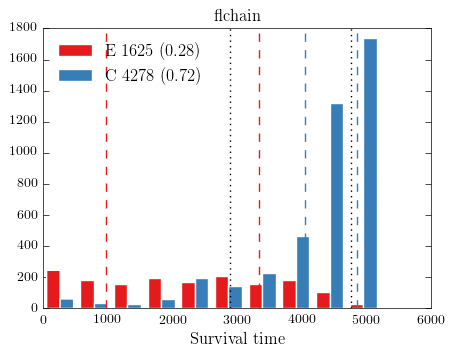

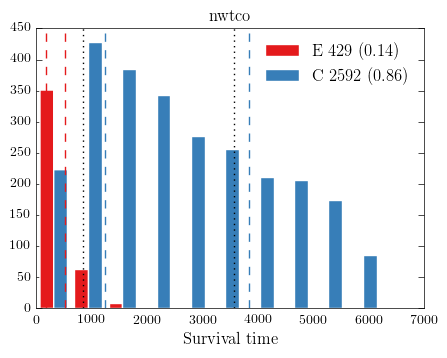

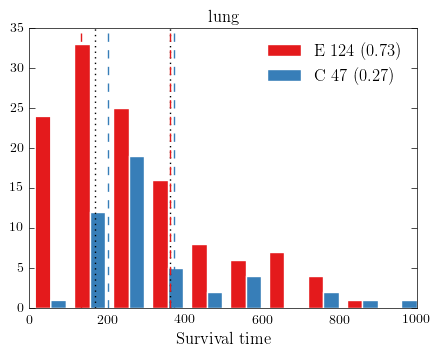

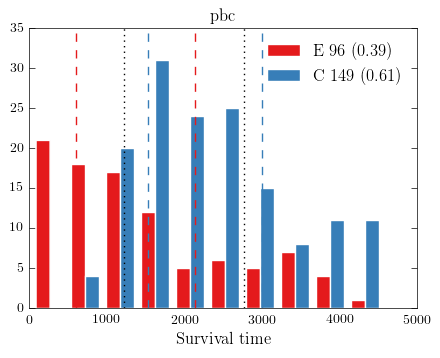

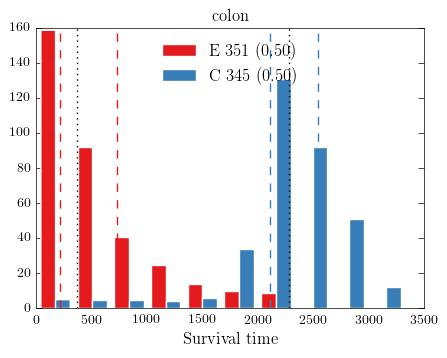

In [27]:
for name, (trn, test) in datasets.items():
    plt.figure()
    plt.title(name)
    plt.xlabel("Survival time")
    
    c = (trn.iloc[:, 1] == 0).values.ravel()
    
    censed = trn.iloc[c, 0].values.ravel()
    events = trn.iloc[~c, 0].values.ravel()
    
    plt.hist([events, censed], cumulative=False, normed=False,
             histtype='bar', 
             label=['E {} ({:.2f})'.format(np.sum(~c), np.sum(~c)/trn.shape[0]),
                    'C {} ({:.2f})'.format(np.sum(c), np.sum(c)/trn.shape[0])])
    
    # Plot quartile lines
    bottom, top = plt.ylim()
    
    t25 = np.percentile(trn.iloc[:, 0], 25)
    t75 = np.percentile(trn.iloc[:, 0], 75)
    plt.plot([t25, t25], [bottom, top], 'k:')
    plt.plot([t75, t75], [bottom, top], 'k:')
    
    e25 = np.percentile(trn.iloc[~c, 0], 25)
    e75 = np.percentile(trn.iloc[~c, 0], 75)
    plt.plot([e25, e25], [bottom, top], plt.colors[0], linestyle='--')
    plt.plot([e75, e75], [bottom, top], plt.colors[0], linestyle='--')
    
    c25 = np.percentile(trn.iloc[c, 0], 25)
    c75 = np.percentile(trn.iloc[c, 0], 75)
    plt.plot([c25, c25], [bottom, top], plt.colors[1], linestyle='--')
    plt.plot([c75, c75], [bottom, top], plt.colors[1], linestyle='--')
    
    plt.legend(loc='best', framealpha=0)